In [78]:
from bs4 import BeautifulSoup

from getpass import getpass
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import pandas as pd
import requests
import time

In [20]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://nomadlist.com/")


In [39]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

In [89]:
screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
i = 1
time.sleep(2)  # Allow 2 seconds for the web page to open
scroll_pause_time = 1
while True:
    # scroll one screen height each time
    driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
    i += 1
    time.sleep(scroll_pause_time)
    # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
    scroll_height = driver.execute_script("return document.body.scrollHeight;")  
    # Break the loop when the height we need to scroll to is larger than the total scroll height
    if (screen_height) * i > scroll_height:
        break

<html class="htmlFunction pageType-cities filters-folded frontpage show-grid-side nomadlist no-js y new-user has-head-image grid-view X user units-metric dark is-not-mobile is_chrome" data-dark-mode="off" data-date="2022-12-05" lang="en-US">
 <head>
  <script async="" crossorigin="anonymous" integrity="sha384-Sd4v961W80O0yv+H1PR3AwdClLs8iR1IRo68cW/Mo6SdVwf2YOHWgMTa4aukLunX" src="https://www.gstatic.com/recaptcha/releases/Km9gKuG06He-isPsP6saG8cn/recaptcha__es.js" type="text/javascript">
  </script>
  <script>
   var staticCacheBuster='2022-12-05';
  </script>
  <meta charset="utf-8"/>
  <script>
   /* load this stuff first b4 other JS cuz it's ESSENTIAL */
						var exchangeRatesSymbols = {"SATS":"\u738b","BTC":"m\u0e3f","ETH":"m\u039e","BDT":"\u09f3","NTD":"NT$","TRY":"\u20ba","MAD":".\u062f.\u0645.","AED":"\u062f.\u0625","ALL":"&#76;&#101;&#107;","AFN":"&#1547;","ARS":"Ar&#36;","AWG":"&#402;","AUD":"A&#36;","AZN":"&#1084;&#1072;&#1085;","BSD":"B&#36;","BBD":"Bds&#36;","BYR":"&#112;&#
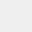

In [4]:
# First thing I can do: grab the page
soup_selenium = BeautifulSoup(driver.page_source, 'html.parser')
print(soup_selenium.prettify())

In [118]:
### City Name
city = list(map(lambda name: name.text, driver.find_elements_by_class_name('itemName')))
city

### Country
country = list(map(lambda cont: cont.text, driver.find_elements_by_class_name('itemSub')))
country

### Description
description = list(map(lambda name: name.text, driver.find_elements_by_class_name('description')))
description

### Ranking
rank = list(map(lambda name: name.text, driver.find_elements_by_class_name('rank')))
rank

### Cost of living
cost = list(map(lambda name: name.text, driver.find_elements_by_class_name('price')))
cost

['Portugal',
 'Thailand',
 'Indonesia',
 'Thailand',
 'Portugal',
 'Argentina',
 'Mexico',
 'Romania',
 'Germany',
 'India',
 'Spain',
 'South Africa',
 'Colombia',
 'Malaysia',
 'Portugal',
 'Portugal',
 '',
 'Spain',
 'Vietnam',
 'Portugal',
 'Malaysia',
 'Spain',
 'Thailand',
 'Romania',
 'Kenya',
 'Nepal',
 'Turkey',
 'Indonesia',
 'Bulgaria',
 'Georgia',
 'Poland',
 'Romania',
 'Serbia',
 'Indonesia',
 'India',
 'Vietnam',
 'Thailand',
 'Indonesia',
 'Philippines',
 'India',
 'Philippines',
 'Mexico',
 'Portugal',
 'Bulgaria',
 'Estonia',
 'Philippines',
 'Croatia',
 'Peru',
 'United States',
 'Laos',
 'Poland',
 'United States',
 'Poland',
 'United Kingdom',
 'Ecuador',
 'Spain',
 'Germany',
 'Romania',
 'Australia',
 'Morocco',
 'Turkey',
 'Czechia',
 'Germany',
 'United States',
 'Vietnam',
 'China',
 'Croatia',
 'Poland',
 'United States',
 'Bulgaria',
 'Romania',
 'Cambodia',
 'Mexico',
 'Philippines',
 'Serbia',
 'Vietnam',
 'Mexico',
 'Cuba',
 'United States',
 'Thailand',


In [119]:
### update lists 
### delete 2 position from city
city.remove('') 
city.remove('Visit Asia')

### delete from country
country.remove('')

### delete from cost
cost.remove('')
del cost[1348:]

['Lisbon', 'Chiang Mai', 'Canggu, Bali', 'Bangkok', 'Madeira', 'Buenos Aires', 'Mexico City', 'Timisoara', 'Berlin', 'Bengaluru', 'Gran Canaria, Canary Islands', 'Cape Town', 'Medellín', 'Penang', 'Portimão', 'Lagos, Algarve', 'Fuerteventura, Canary Islands', 'Ho Chi Minh City', 'Porto', 'Kuala Lumpur', 'Tenerife, Canary Islands', 'Ko Pha Ngan', 'Brasov', 'Nairobi', 'Kathmandu', 'Istanbul', 'Ubud, Bali', 'Varna', 'Tbilisi', 'Warsaw', 'Cluj', 'Belgrade', 'Seseh', 'Delhi', 'Da Nang', 'Phuket', 'Seminyak', 'Cebu', 'Hyderabad', 'Davao', 'Guadalajara', 'Azores', 'Sofia', 'Tallinn', 'Manila', 'Zadar', 'Lima', 'San Antonio', 'Luang Prabang', 'Wrocław', 'Atlanta', 'Kraków', 'London', 'Cuenca', 'Mallorca', 'Dresden', 'Ploiesti', 'Perth', 'Taghazout', 'Antalya', 'Brno', 'Munich', 'Austin', 'Hanoi', 'Haikou', 'Zagreb', 'Gdansk', 'Dallas', 'Plovdiv', 'Constanta', 'Siem Reap', 'Puerto Escondido', 'Palawan', 'Nis', 'Phu Quoc', 'Cancun', 'Havana', 'Tampa', 'Krabi', 'Ericeira', 'Port Louis', 'Buchares

In [141]:
### Check Lengths
print('cost ', len(cost))
print('rank ', len(rank))
print('desc ', len(description))
print('cont ', len(country))
print('city ', len(city))

cost  1348
rank  1348
desc  1349
cont  1348
city  1348


In [ ]:
### Create DF
nomadlist = pd.DataFrame({
        'Rank': rank,
        'City': city, 
        'Country': country, 
        'Cost of Living': cost, 
        'Description': description
    })

In [144]:
description = list(map(lambda name: name.text, driver.find_elements_by_xpath('//*[@id="body"]/div[8]/ul/li[1349]/span[2]/p')))
description

['']